**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Introducción al aprendizaje automático**

*Edición 2022*

---

### *Grupo N°:* 18

### *Integrantes:*
#### Parada Larrosa, Francisco
#### Peralta, Agustín
####  Porcel, Carolina
####  Quiros, Agustina

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")

In [3]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


**1**. El conjunto de datos es una muestra de un dataset de Kaggle que contiene información sobre una base de clientes de un banco que solicitan un crédito.

**2**. La variable que hay que predecir es la variable target que indica si la persona es apta para recibir o no un crédito hipotecario

**3.**
 TARGET:  Label: 1 = El cliente no cumplió la devolución del préstamo 
                0 = El préstamo fue reembolsado

 LOAN: Importe de la solicitud de préstamo

 MORTDUE: Cantidad adeudada en la hipoteca existente

 VALUE: Valor actual de la propiedad

 YOJ: Años de antigüedad en el trabajo actual

 DEROG: Números de informes negativos

 DELINQ: Número de líneas crediticias morosas

 CLAGE: Cantidad en meses de la línea comercial más antigua

 NINQ: Número de líneas de créditos recientes

 CLNO: Número de líneas de crédito
 
 DEBTINC: Relación deuda-ingresos

**4.** Creemos que los más determinantes para la predicción serán:
       DELINQ, DEBTINC, LOAN, DEROG

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


**Carga de datos y división en entrenamiento y evaluación**

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [4]:
X, y = dataset.iloc[:, 1:], dataset.TARGET

Division

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8, random_state=0)

Escalado con MinMaxScaler

In [6]:
transformer = MinMaxScaler().fit(X_train)
X_train = transformer.transform(X_train)
X_train

array([[0.08740068, 0.22020392, 0.21221918, ..., 0.09090909, 0.33846154,
        0.24772681],
       [0.14869467, 0.09740341, 0.08073554, ..., 0.09090909, 0.13846154,
        0.18325638],
       [0.20885358, 0.13738207, 0.11970963, ..., 0.18181818, 0.43076923,
        0.25119346],
       ...,
       [0.12599319, 0.1232246 , 0.12753456, ..., 0.        , 0.24615385,
        0.15792933],
       [0.22247446, 0.14636413, 0.14859635, ..., 0.09090909, 0.33846154,
        0.24214136],
       [0.0692395 , 0.16261412, 0.12075946, ..., 0.        , 0.21538462,
        0.29277269]])

In [7]:
X_test = transformer.transform(X_test)
X_test

array([[0.02837684, 0.11323184, 0.07608656, ..., 0.        , 0.29230769,
        0.1351224 ],
       [0.19977299, 0.11409018, 0.11189284, ..., 0.27272727, 0.41538462,
        0.24547311],
       [0.12826334, 0.18573333, 0.17356044, ..., 0.        , 0.4       ,
        0.1676507 ],
       ...,
       [0.28603859, 0.17070483, 0.16396951, ..., 0.        , 0.32307692,
        0.24785972],
       [0.12826334, 0.19035768, 0.18091336, ..., 0.09090909, 0.2       ,
        0.23126416],
       [0.14074915, 0.11852915, 0.08635703, ..., 0.36363636, 0.12307692,
        0.23686435]])

## Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [8]:
from sklearn.linear_model import SGDClassifier

In [9]:
# Utilizamos class_weight para ponderar los pesos de las clases dado que se encontraban muy desbalanceadas
cl = SGDClassifier(random_state=123,class_weight="balanced")

In [10]:
cl.fit(X_train,y_train)

SGDClassifier(class_weight='balanced', random_state=123)

In [11]:
cl.coef_

array([[-1.90372507, -0.94248929,  0.86974411, -0.67447538,  7.53705025,
         7.78333889, -6.46183406,  1.63330735, -0.86787985,  8.35024224]])

In [12]:
y_pred_train = cl.predict(X_train)

In [13]:
print("Matriz de Confusión para test y pred\n")
confusion_matrix(y_train, y_pred_train)

Matriz de Confusión para test y pred



array([[1096,  136],
       [ 114,  137]])

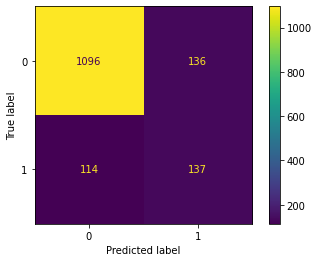

In [14]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()



> **Métricas para conjunto de entrenamiento con parámetros por defecto**



In [15]:
print("MÉTRICAS PARA CONJUNTO DE ENTRENAMIENTO\n")
print("Accuracy:",round(accuracy_score(y_train, y_pred_train),2))
print("Precision:",round(precision_score(y_train,y_pred_train),2))
print("Recall:",round(recall_score(y_train, y_pred_train),2))
print("F1:",round(f1_score(y_train, y_pred_train),2))

MÉTRICAS PARA CONJUNTO DE ENTRENAMIENTO

Accuracy: 0.83
Precision: 0.5
Recall: 0.55
F1: 0.52


## Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [16]:
from sklearn.utils.fixes import loguniform
param_grid = {
    'loss': ['hinge'],
    'alpha': loguniform.rvs(1e-4, 1e0, size=10),
    'learning_rate':['optimal'],
    'max_iter':[10,100,1000],
    'class_weight':['balanced']
}

In [17]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
    print(params)
    model = SGDClassifier(**params, random_state=123)

{'alpha': 0.15679963643122935, 'class_weight': 'balanced', 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 10}
{'alpha': 0.15679963643122935, 'class_weight': 'balanced', 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 100}
{'alpha': 0.15679963643122935, 'class_weight': 'balanced', 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000}
{'alpha': 0.02929160339314134, 'class_weight': 'balanced', 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 10}
{'alpha': 0.02929160339314134, 'class_weight': 'balanced', 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 100}
{'alpha': 0.02929160339314134, 'class_weight': 'balanced', 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000}
{'alpha': 0.5288252010186857, 'class_weight': 'balanced', 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 10}
{'alpha': 0.5288252010186857, 'class_weight': 'balanced', 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 100}
{'alpha': 0.5288252010186857, 'clas

In [18]:
from sklearn.model_selection import GridSearchCV

model = SGDClassifier(random_state=123)

cv = GridSearchCV(model, param_grid,scoring='f1') # f1
cv.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

In [19]:
results = cv.cv_results_
params = results['params']
mean_accu = results['mean_test_score']
std_accu = results['std_test_score']
rank_accu = results['rank_test_score']

print("loss.\talpha\t\t\tlearning_rate\tmax_iter\t | mean\tstd\trank")
for p, m_a, s_a, r_a in zip(params, mean_accu,std_accu, rank_accu):
    print(f"{p['loss']}\t{p['alpha']}\t{p['learning_rate']}\t\t{p['max_iter']}\t\t | {m_a:0.2f}\t{s_a:0.2f}\t{r_a}")

loss.	alpha			learning_rate	max_iter	 | mean	std	rank
hinge	0.15679963643122935	optimal		10		 | 0.28	0.15	22
hinge	0.15679963643122935	optimal		100		 | 0.28	0.15	23
hinge	0.15679963643122935	optimal		1000		 | 0.28	0.15	23
hinge	0.02929160339314134	optimal		10		 | 0.37	0.10	13
hinge	0.02929160339314134	optimal		100		 | 0.37	0.10	14
hinge	0.02929160339314134	optimal		1000		 | 0.37	0.10	14
hinge	0.5288252010186857	optimal		10		 | 0.12	0.14	25
hinge	0.5288252010186857	optimal		100		 | 0.12	0.14	25
hinge	0.5288252010186857	optimal		1000		 | 0.12	0.14	25
hinge	0.5623943891098692	optimal		10		 | 0.12	0.14	25
hinge	0.5623943891098692	optimal		100		 | 0.12	0.14	25
hinge	0.5623943891098692	optimal		1000		 | 0.12	0.14	25
hinge	0.007858694497658717	optimal		10		 | 0.45	0.02	7
hinge	0.007858694497658717	optimal		100		 | 0.46	0.04	3
hinge	0.007858694497658717	optimal		1000		 | 0.46	0.04	3
hinge	0.1065096731938816	optimal		10		 | 0.29	0.10	19
hinge	0.1065096731938816	optimal		100		 | 0.29	0.10	19
hin

In [20]:
best_model_b1 = cv.best_estimator_
best_model_b1

SGDClassifier(alpha=0.0003697327054136875, class_weight='balanced',
              max_iter=100, random_state=123)

In [21]:
best_model_b1.fit(X_train,y_train)

SGDClassifier(alpha=0.0003697327054136875, class_weight='balanced',
              max_iter=100, random_state=123)

In [22]:
y_pred_train_b = best_model_b1.predict(X_train)

In [23]:
print("Matriz de Confusión para test y pred\n")
confusion_matrix(y_train, y_pred_train_b)

Matriz de Confusión para test y pred



array([[1087,  145],
       [ 110,  141]])

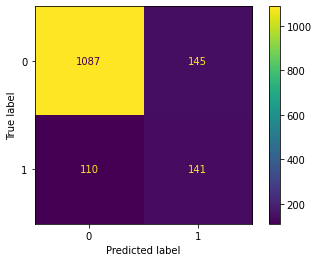

In [24]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_b)
plt.show()



> **Métricas para conjunto de entrenamiento luego de haber encontrado los mejores parámetros**



In [25]:
print("NUEVAS MÉTRICAS PARA CONJUNTO DE ENTRENAMIENTO\n")
print("Accuracy:",round(accuracy_score(y_train, y_pred_train_b),2)) # aplico round
print("Precision:",round(precision_score(y_train,y_pred_train_b),2))
print("Recall:",round(recall_score(y_train, y_pred_train_b),2))
print("F1:",round(f1_score(y_train, y_pred_train_b),2))

NUEVAS MÉTRICAS PARA CONJUNTO DE ENTRENAMIENTO

Accuracy: 0.83
Precision: 0.49
Recall: 0.56
F1: 0.53


### Mejor modelo con datos de Test

In [26]:
y_test_pred = best_model_b1.predict(X_test)

borrador:
antes daba [282,31 - 27,31]

In [27]:
print("Matriz de Confusión para test y pred\n")
confusion_matrix(y_test, y_test_pred)

Matriz de Confusión para test y pred



array([[283,  30],
       [ 28,  30]])

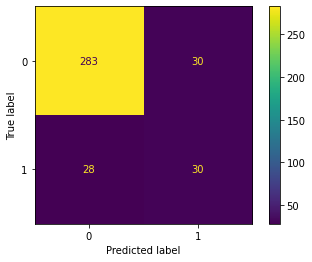

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()



> **Conjunto de TEST**



In [29]:
print("MÉTRICAS PARA CONJUNTO DE TEST\n")
print("Accuracy:",round(accuracy_score(y_test, y_test_pred),2))
print("Precision:",round(precision_score(y_test, y_test_pred),2))
print("Recall: ",round(recall_score(y_test, y_test_pred),2))
print("F1: ",round(f1_score(y_test, y_test_pred),2))

MÉTRICAS PARA CONJUNTO DE TEST

Accuracy: 0.84
Precision: 0.5
Recall:  0.52
F1:  0.51


# Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [31]:
#Profundidad del arbol
clf.get_depth()

22

In [32]:
y_train_pred_tc = clf.predict(X_train)

In [33]:
print("Matriz de Confusión para test y pred\n")
confusion_matrix(y_train, y_train_pred_tc)

Matriz de Confusión para test y pred



array([[1232,    0],
       [   0,  251]])

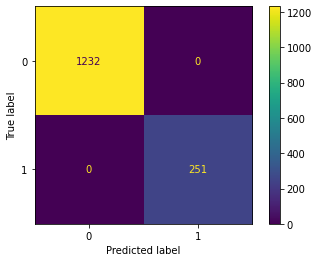

In [34]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_tc)
plt.show()



> Métricas conjunto de entrenamiento con parámetros por defecto



In [35]:
train_acc = accuracy_score(y_train, y_train_pred_tc)
train_prec = precision_score(y_train, y_train_pred_tc)
train_rec = recall_score(y_train, y_train_pred_tc)
train_f1 = f1_score(y_train, y_train_pred_tc)

In [36]:
print("Accuracy:",train_acc)
print("Precision:",train_prec)
print("Recall:",train_rec)
print("F1:",train_f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [37]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

In [38]:
# Elegimos una profundidad de 4 dado que a partir de 5 las métricas comenzaron a desmejorar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4],
}

In [39]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
    print(params)
    model = DecisionTreeClassifier(**params, random_state=123)

{'criterion': 'gini', 'max_depth': 1}
{'criterion': 'gini', 'max_depth': 2}
{'criterion': 'gini', 'max_depth': 3}
{'criterion': 'gini', 'max_depth': 4}
{'criterion': 'entropy', 'max_depth': 1}
{'criterion': 'entropy', 'max_depth': 2}
{'criterion': 'entropy', 'max_depth': 3}
{'criterion': 'entropy', 'max_depth': 4}


In [40]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=123)

cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=None)
cv.fit(X_train, y_train);

In [41]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("crit.\tdepth\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['criterion']}\t{p['max_depth']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

crit.	depth	| mean	std	rank
gini	1	| 0.87	0.01	6
gini	2	| 0.87	0.01	4
gini	3	| 0.88	0.01	2
gini	4	| 0.88	0.02	1
entropy	1	| 0.87	0.01	6
entropy	2	| 0.87	0.01	8
entropy	3	| 0.87	0.01	3
entropy	4	| 0.87	0.01	5


In [42]:
import pandas as pd
df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']]
#df

,param_criterion,param_max_depth,mean_test_score,std_test_score,rank_test_score
0,gini,1,0.869194,0.009254,6
1,gini,2,0.871888,0.007575,4
2,gini,3,0.877955,0.010041,2
3,gini,4,0.877958,0.015814,1
4,entropy,1,0.869194,0.009254,6
5,entropy,2,0.868519,0.008119,8
6,entropy,3,0.873239,0.013509,3
7,entropy,4,0.871214,0.013813,5


**Mejores Parámetros**

In [43]:
best_model_tc = cv.best_estimator_

In [44]:
best_model_tc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=123)

In [45]:
y_train_pred_tcbm = best_model_tc.predict(X_train)

In [46]:
print("Matriz de Confusión para test y pred\n")
confusion_matrix(y_train, y_train_pred_tcbm)

Matriz de Confusión para test y pred



array([[1223,    9],
       [ 145,  106]])

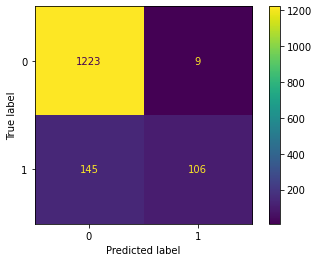

In [47]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_tcbm)
plt.show()

In [48]:
print("MÉTRICAS PARA CONJUNTO DE ENTRENAMIENTO CON AJUSTE DE HIPERPARÁMETROS\n")
print("Accuracy:",accuracy_score(y_train, y_train_pred_tcbm))
print("Precision:",precision_score(y_train, y_train_pred_tcbm))
print("Recall:",recall_score(y_train, y_train_pred_tcbm))
print("F1:",f1_score(y_train, y_train_pred_tcbm))

MÉTRICAS PARA CONJUNTO DE ENTRENAMIENTO CON AJUSTE DE HIPERPARÁMETROS

Accuracy: 0.8961564396493594
Precision: 0.9217391304347826
Recall: 0.42231075697211157
F1: 0.5792349726775956


###Mejor Modelo con Test

In [49]:
y_test_pred_tc = best_model_tc.predict(X_test)

In [50]:
print("Matriz de Confusión para test\n")
confusion_matrix(y_test, y_test_pred_tc)

Matriz de Confusión para test



array([[305,   8],
       [ 35,  23]])

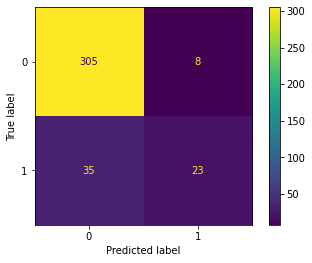

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_tc)
plt.show()



>**Conjunto TEST**



In [52]:
print("MÉTRICAS PARA CONJUNTO DE TEST\n")
print("Accuracy:",round(accuracy_score(y_test, y_test_pred_tc),2))
print("Precision:",round(precision_score(y_test, y_test_pred_tc),2))
print("Recall:",round(recall_score(y_test, y_test_pred_tc),2))
print("F1:",round(f1_score(y_test, y_test_pred_tc),2))

MÉTRICAS PARA CONJUNTO DE TEST

Accuracy: 0.88
Precision: 0.74
Recall: 0.4
F1: 0.52


In [53]:
best_model = cv.best_estimator_

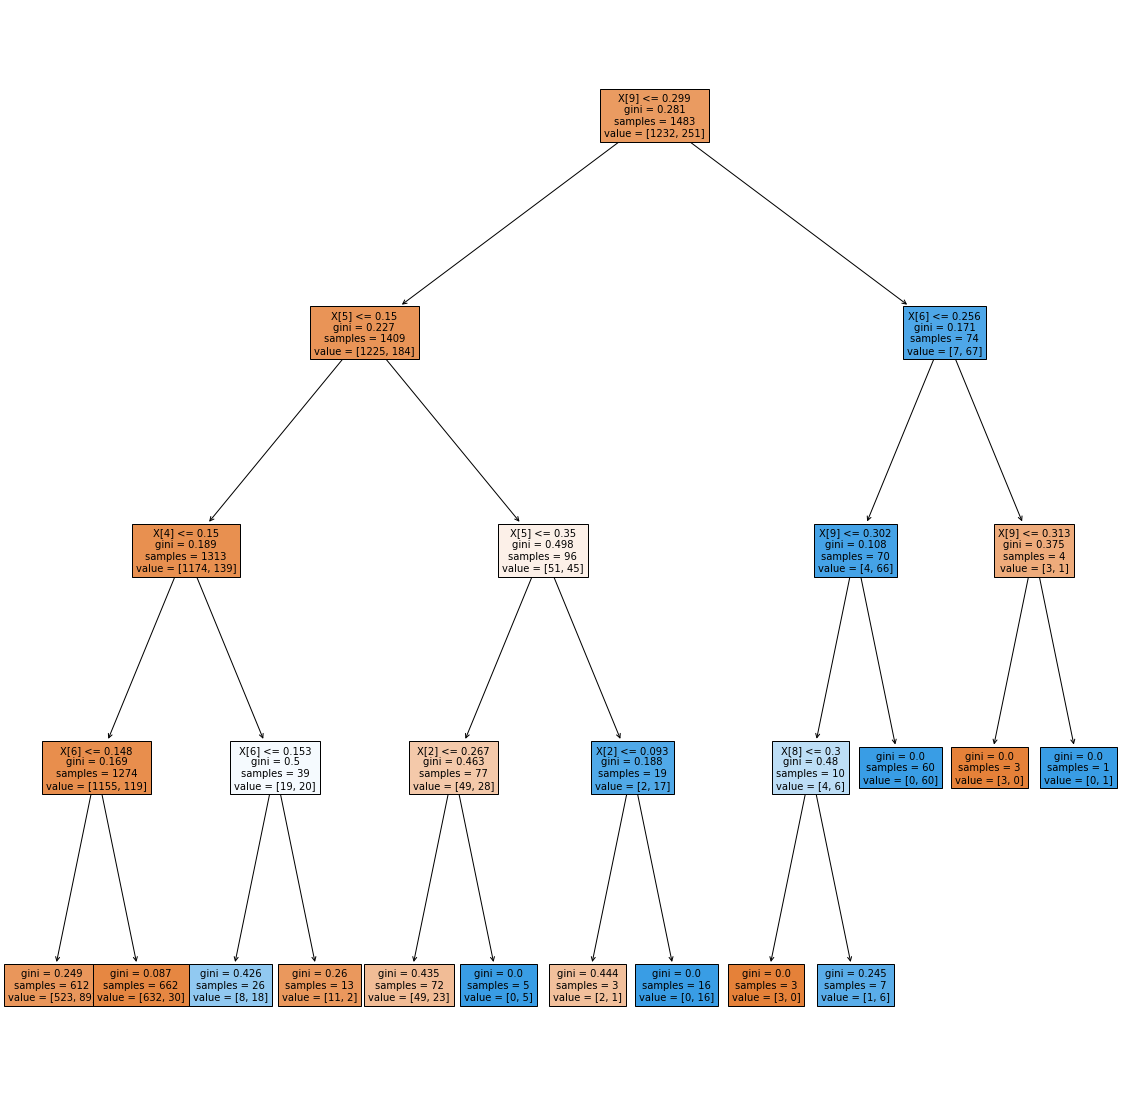

In [54]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
plot_tree(best_model, fontsize=10,filled=True)
plt.show()